In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()
titanic.shape

(891, 12)

# Dropping Useless Columns 

In [6]:
titanic.drop("Name", inplace = True, axis = 1)
titanic.drop("Ticket", inplace = True, axis = 1)
titanic.drop("Cabin", inplace = True, axis = 1)
titanic.shape

(891, 9)

In [7]:
#titanic.dropna(subset = ["Sex", "Embarked", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"], inplace=True)
#
#titanic = titanic.reset_index(drop=True)
#titanic.shape
#print(titanic.describe())
#titanic.head(30)


# Label Encoder 

In [8]:
from sklearn.preprocessing import LabelEncoder
titanic = titanic.apply(LabelEncoder().fit_transform)
#titanic.head(30)

In [9]:
#print(titanic['SibSp'].value_counts())
#print(titanic['Parch'].value_counts())
#print(titanic['Embarked'].value_counts())
#print(titanic['Sex'].value_counts())
#print(titanic['Pclass'].value_counts())

# Train-Test Split

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(titanic, titanic['SibSp']):
    strat_train_set = titanic.loc[train_index]
    strat_test_set = titanic.loc[test_index]

In [11]:
print(strat_train_set.shape)
titanic = strat_train_set.copy() #Making titanic copy of train set

(712, 9)


In [12]:
#print(strat_test_size['Parch'].value_counts())
#print(strat_test_size['Embarked'].value_counts())
#print(strat_test_size['Sex'].value_counts())
#print(strat_test_size['Pclass'].value_counts())
#print(strat_test_size['SibSp'].value_counts())
print(strat_train_set.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


# Features and Labels

In [13]:
PassengerId = strat_train_set['PassengerId']
titanic_labels = strat_train_set['Survived']
strat_train_set.drop('Survived', inplace=True, axis=1)
strat_train_set.drop('PassengerId', inplace=True, axis=1)
titanic_features = strat_train_set

PassengerId_test = strat_test_set['PassengerId']
titanic_labels_test = strat_test_set['Survived']
strat_test_set.drop('Survived', inplace=True, axis=1)
strat_test_set.drop('PassengerId', inplace=True, axis=1)
titanic_features_test = strat_test_set

# Missing Attributes

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(titanic_features)

SimpleImputer(strategy='median')

In [15]:
X = imputer.transform(titanic_features)
#print(titanic.describe())
titanic_tr = pd.DataFrame(X, columns = titanic_features.columns)
print(titanic_tr.describe())

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     1.299157    0.653090   49.213483    0.508427    0.397472  106.637640   
std      0.837987    0.476321   25.991223    1.011849    0.830599   69.878079   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000   28.000000    0.000000    0.000000   41.000000   
50%      2.000000    1.000000   44.000000    0.000000    0.000000   96.000000   
75%      2.000000    1.000000   72.000000    1.000000    0.000000  158.000000   
max      2.000000    1.000000   88.000000    6.000000    6.000000  247.000000   

         Embarked  
count  712.000000  
mean     1.522472  
std      0.805781  
min      0.000000  
25%      1.000000  
50%      2.000000  
75%      2.000000  
max      3.000000  


In [16]:
#X = titanic[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].values
#
#from sklearn.preprocessing import LabelEncoder
#le_sex = LabelEncoder()
#le_sex.fit(['male','female'])
#X[:,1] = le_sex.transform(X[:,1])
#
#embarked = LabelEncoder()
#embarked.fit(['C','Q','S'])
#
#X[:,6] = embarked.transform(X[:,6])
#print(X)

In [17]:
#%matplotlib inline
#from matplotlib import pyplot as plt

In [18]:
#titanic.hist(bins=50, figsize = (20,15))
#plt.show()

# Correlations

In [19]:
#corr_m = titanic.corr()
#corr_m['Survived'].sort_values(ascending=False)

# Scatter Matrix

In [20]:
#from pandas.plotting import scatter_matrix
#attributes = ["Survived",'Fare','Sex','Pclass']
#scatter_matrix(titanic[attributes],figsize = (12,8))

# Model Selection

In [21]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(titanic_features,titanic_labels)
print(LR,'\n')

LogisticRegression(C=0.01, solver='liblinear') 



In [22]:
yhat = LR.predict(titanic_features_test)
print(yhat,'\n')

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0] 



In [23]:
yhat_prob = LR.predict_proba(titanic_features_test)
#print(yhat_prob,'\n')

In [24]:
from sklearn.metrics import jaccard_score
jaccard_score(titanic_labels_test, yhat,pos_label=0)

0.6575342465753424

In [25]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(titanic_labels_test, yhat, labels=[1,0]))


[[33 43]
 [ 7 96]]


In [26]:
# Compute confusion matrix
import numpy as np
cnf_matrix = confusion_matrix(titanic_labels_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[33 43]
 [ 7 96]]


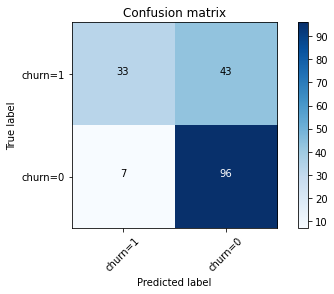

In [27]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


In [28]:
print (classification_report(titanic_labels_test, yhat))


              precision    recall  f1-score   support

           0       0.69      0.93      0.79       103
           1       0.82      0.43      0.57        76

    accuracy                           0.72       179
   macro avg       0.76      0.68      0.68       179
weighted avg       0.75      0.72      0.70       179



In [29]:
#logloss
from sklearn.metrics import log_loss
print(log_loss(titanic_labels_test, yhat_prob))

0.5490875033167949


# Kaggle Test File